<a href="https://colab.research.google.com/github/mahyahashemi/RKHS_Project/blob/main/code_fvs_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn import datasets, svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [367]:
N_m=50

In [369]:
url = 'https://raw.githubusercontent.com/mahyahashemi/RKHS_Project/main/datasets/glass1.csv'
sample = pd.read_csv(url, on_bad_lines='skip')

In [370]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [371]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Class'])
encoder

OrdinalEncoder(cols=['Class'])

In [372]:
sample=encoder.fit_transform(sample)

In [373]:
sample=sample.fillna(0)
sample

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.515888,12.87795,3.43036,1.40066,73.2820,0.68931,8.04468,0.00000,0.1224,1
1,1.517642,12.97770,3.53812,1.21127,73.0020,0.65205,8.52888,0.00000,0.0000,1
2,1.522130,14.20795,3.82099,0.46976,71.7700,0.11178,9.57260,0.00000,0.0000,1
3,1.522221,13.21045,3.77160,0.79076,71.9884,0.13041,10.24520,0.00000,0.0000,1
4,1.517551,13.39000,3.65935,1.18880,72.7892,0.57132,8.27064,0.00000,0.0561,1
...,...,...,...,...,...,...,...,...,...,...
209,1.517278,14.70005,0.00000,2.34119,73.2820,0.00000,8.94852,0.66150,0.0000,1
210,1.516230,14.14145,0.00000,2.88047,72.6100,0.08073,9.18524,1.06155,0.0000,1
211,1.518371,14.32100,3.25974,2.21921,71.2492,1.45935,5.78508,1.62855,0.0000,1
212,1.516572,14.79980,0.00000,1.99130,73.1084,0.00000,8.28140,1.71045,0.0000,1


In [374]:
pd.unique(sample['Class'])

array([1, 2])

In [375]:
df=sample.values

In [376]:
data= df[:,:-1]
y = df[:,-1]

In [377]:
display(data)
display(y)

array([[ 1.51588824, 12.87795   ,  3.43036   , ...,  8.04468   ,
         0.        ,  0.1224    ],
       [ 1.5176423 , 12.9777    ,  3.53812   , ...,  8.52888   ,
         0.        ,  0.        ],
       [ 1.52212996, 14.20795   ,  3.82099   , ...,  9.5726    ,
         0.        ,  0.        ],
       ...,
       [ 1.51837126, 14.321     ,  3.25974   , ...,  5.78508   ,
         1.62855   ,  0.        ],
       [ 1.51657164, 14.7998    ,  0.        , ...,  8.2814    ,
         1.71045   ,  0.        ],
       [ 1.51732338, 14.95275   ,  0.        , ...,  8.61496   ,
         1.5498    ,  0.        ]])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [378]:
from sklearn.preprocessing import  MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data)
scaler.data_min_

array([ 1.51115, 10.73   ,  0.     ,  0.29   , 69.81   ,  0.     ,
        5.43   ,  0.     ,  0.     ])

In [379]:
scaler.data_max_

array([ 1.53393, 17.38   ,  4.49   ,  3.5    , 75.41   ,  6.21   ,
       16.19   ,  3.15   ,  0.51   ])

In [380]:
scaler.transform(data)  #(x-min)/(max-min)

array([[0.208, 0.323, 0.764, ..., 0.243, 0.   , 0.24 ],
       [0.285, 0.338, 0.788, ..., 0.288, 0.   , 0.   ],
       [0.482, 0.523, 0.851, ..., 0.385, 0.   , 0.   ],
       ...,
       [0.317, 0.54 , 0.726, ..., 0.033, 0.517, 0.   ],
       [0.238, 0.612, 0.   , ..., 0.265, 0.543, 0.   ],
       [0.271, 0.635, 0.   , ..., 0.296, 0.492, 0.   ]])

In [381]:
from sklearn.preprocessing import normalize

In [382]:
A=normalize(data,norm='l2',axis=0)
A

array([[0.06824691, 0.06550808, 0.076988  , ..., 0.0606118 , 0.        ,
        0.08233482],
       [0.06832588, 0.06601549, 0.07940647, ..., 0.06425995, 0.        ,
        0.        ],
       [0.06852792, 0.07227357, 0.08575495, ..., 0.07212375, 0.        ,
        0.        ],
       ...,
       [0.0683587 , 0.07284864, 0.07315875, ..., 0.04358708, 0.21102704,
        0.        ],
       [0.06827768, 0.07528422, 0.        , ..., 0.06239534, 0.22163961,
        0.        ],
       [0.06831152, 0.07606225, 0.        , ..., 0.06490851, 0.20082263,
        0.        ]])

In [383]:
A_train,A_test=train_test_split(A,test_size=0.3,random_state=42)
y_train,y_test=train_test_split(y,test_size=0.3,random_state=42)

In [384]:
data.shape

(214, 9)

In [385]:
def sigma(A):
    N = A.shape[0]
    sigma = []
    for i in range(N):
        for j in range(i+1, N):
            sigma.append(np.square(np.linalg.norm(A[i,:]-A[j,:])))

    return 0.1 * np.max(sigma)

In [386]:
sig=sigma(A)
print(sig)

0.04010848189921798


In [387]:
def K(FV1, FV2):
    dist = np.linalg.norm(FV1-FV2)
    return np.exp(-1*np.square(dist)/(2*sig))

In [388]:
def give_KSS(S):
    KSS = []
    for i in S:
        for j in S:
            KSS.append( K(A[i,:], A[j,:]))

    return np.array(KSS).reshape((len(S), len(S)))

In [389]:
def give_KSx(S, x):
    KSx = []
    for i in S:
        kx = K(A[i,:], x)
        KSx.append(kx)
    return np.array(KSx).reshape((len(S), 1))

In [390]:
def give_beta(S, x):
    KSx = give_KSx(S, x).reshape(len(S), 1)
    KSS = give_KSS(S)
    DSS = np.diag(np.diag(np.sqrt(KSS)))
    beta = np.dot(np.dot(np.transpose(KSx), np.linalg.inv(KSS)), DSS)
    return beta

In [391]:
minor_index=np.where(y_train==1)[0].tolist()
lambdamax=-np.inf
best_iter=-1
counter=0
total_S=[]
lam = []
for i in minor_index:
    current_S=[i]
    ctrl=1
    while (len(current_S)<N_m and ctrl==1):
        current_inv =np.linalg.inv(give_KSS(current_S))
        max_LF=-np.inf
        max_LF_index=-1
        remaining=list(set(range(A_train.shape[0]))-set(current_S))
        #print(remaining)
        for j in remaining:
            KSx=give_KSx(current_S,A_train[j,:])
            LF =abs(1-((KSx.T).dot(current_inv).dot(KSx)))
            if LF> max_LF:
                max_LF=LF
                max_LF_index=j
        if(max_LF<0.001):
            ctrl=0
        else:
            current_S.append(max_LF_index)
    total_S.append(current_S)
    
    S0=list(set(current_S)& (set(range(A_train.shape[0]))-set(minor_index)))
    S1=list(set(current_S) & set(minor_index))
    B0=np.zeros((len(S0),len(current_S) ))
    B1=np.zeros((len(S1), len(current_S)))
    rownum=0
    for k in S0:
        B0[rownum,:]=give_beta(current_S, A_train[k,:]).flatten()
        rownum=rownum+1
    rownum=0
    for k in S1:
        B1[rownum,:]=give_beta(current_S, A_train[k,:]).flatten()
        rownum=rownum+1
        
    mean0=B0.mean(axis=0)
    mean1=B1.mean(axis=0)
    
    var0=B0.var(axis=0)
    var1=B1.var(axis=0)
    
    lam=(((mean0-mean1)**2)/(var0+var1))
    

    total_lam=np.sum(lam)/np.shape(lam)[0]
    print(total_lam)
    if(lambdamax<total_lam-1000*((1-(((y_train[current_S]==2).sum())/((y_train[current_S]==1).sum())))**2)):
        lambdamax=total_lam
        best_iter=counter
    counter=counter+1




A_train[total_S[best_iter],:]

print(total_S[best_iter])
        
    
    
    

0.13887016883867223
0.1871106350054205
0.1824204891187872
0.19323135133805103
0.171311880947899
0.19398747399329205
0.183461165681866
0.14846470630894665
0.17554076835553029
0.16835674400305822
0.1443196032919119
0.16251604801335812
0.1656020896744116
0.18098513092863383
0.3131841200639023
0.15335311280543
0.1715781201482007
0.3906521098153179
0.16907819426432594
0.1594830525235725
0.17157811970803513
0.1715781201848495
0.13248090463355328
0.16506747658741466
0.1715781190009051
0.17157811918055776
0.16560546861283382
0.16340905612436996
0.17822247840270877
0.17157812071018205
0.1634348699853017
0.1720570762063649
0.16748210559700732
0.18322867914591665
0.19602684595923933
0.20079466418324393
0.17157812016569085
0.16577573577592228
0.17157812061477584
0.16446969455532737
0.18140836426916218
0.14314870749942774
0.16318499699294806
0.17157811963305114
0.1715781202748941
0.17821907951155522
0.17157812022393376
0.18353918207126352
0.3952873961026097
0.16128904575542635
0.1764950228467959
0.

In [396]:
model = svm.SVC(C=1000,kernel = "rbf", gamma =1/(2*sig))

In [398]:
model.fit(A_train[total_S[best_iter],:], y_train[total_S[best_iter]])

SVC(C=1000, gamma=12.466191097842295)

In [399]:
model.score(A_test, y_test)

0.5230769230769231

In [400]:
model.score(A_valid, y_valid)

ValueError: ignored

In [401]:
# Enter minor major labels
minor_cls = 2
major_cls = 1
cls_types= np.array([major_cls, minor_cls])

In [402]:
cls_types

array([1, 2])

Text(0.5, 89.87999999999997, 'Predicted')

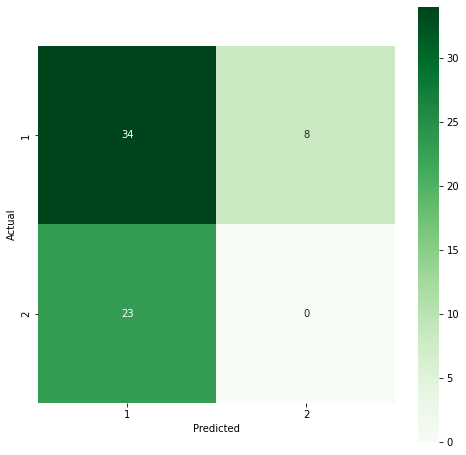

In [403]:
Y_pred = model.predict(A_test)
Y_true = y_test
cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=cls_types, yticklabels=cls_types)
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')

In [404]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

TPR = TP / (TP+FN)
TNR = TN / (TN+FP)
precision = TP / (TP+FP)
recall=TP/(TP+FN)                  

In [405]:
G_mean = np.sqrt(TPR*TNR)
F_measure = (2*precision*TPR)/(precision+TPR)

print(G_mean)
print(F_measure)
print(precision)
print(recall)

0.0
nan
0.0
0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [ ]:
x1 = A_train[:, 0]
x2 = A_train[:, 1]
y1 = y_train.astype(int)
#plt.scatter(x1[y1==0], x2[y1==0], s=25, c='r')
#plt.scatter(x1[y1==1], x2[y1==1], s=25, c='b')
plot_decision_regions(A_train[total_S[best_iter],:], y_train[total_S[best_iter]], clf=model)

In [ ]:
x3 = A_test[:, 0]
x4 = A_test[:, 1]
y2 = y_test.astype(int)
plt.scatter(x3[y2==0], x4[y2==0], s=25, c='green')
plt.scatter(x3[y2==1], x4[y2==1], s=25, c='orange')
plot_decision_regions(A_test, y_test, clf=model)